# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

## Goal
Our goal in this project is to find out the two best markets to advertise our product in.

## Data
We will use data  from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub Repo](https://github.com/freeCodeCamp/2017-new-coder-survey).




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=1
    )


% matplotlib inline

In [2]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Checking for Sample Representativity
As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

When we look at the ```JobRoleInterest``` column, we see that is is common for people to list more than 1 role they are interested in. Let's get a sense of the typical number of roles listed. 

In [5]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = survey_data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31% of survey respondants have a single job they are interested in pursuring. We can view this with a frequency histogram below. 

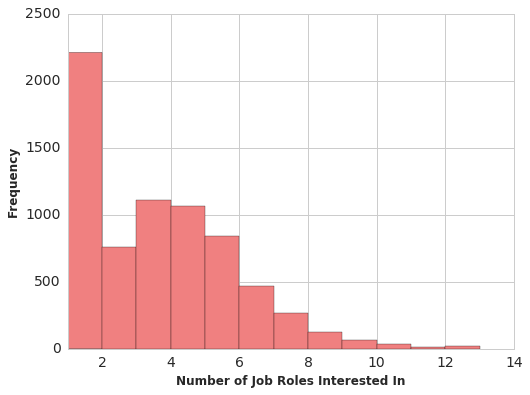

In [6]:
plt.figure(figsize=(8,6))
n_of_options.plot.hist(bins=12,color='lightcoral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Job Roles Interested In')
plt.xlim((1,14))
plt.show()

The focus of our courses in web and mobile development. Let's see how many people are interested in at least one of these two subjects. 

In [7]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans

# True indicates interest in at least one of our focus areas
web_or_mobile.value_counts(normalize=True) * 100

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

So 86% of our survey respondants have an interest in Web or Mobile Development. This is great!



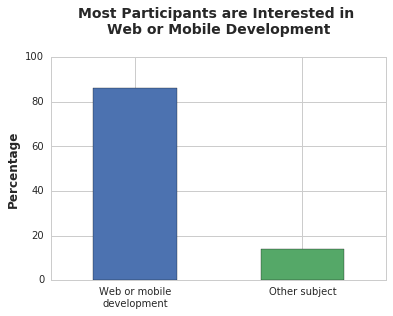

In [8]:
freq_table = web_or_mobile.value_counts(normalize=True) * 100

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

## New Coders - Locations and Densities
Now that we know our survey has the right categories of people for our interests, let's begin analyzing it. To start, let's look at where people are located. We will use the ```CountryLive``` column, which describes where participants currently live. Let's generate a frequency table for this column. We will omit participants who did not respond with what job role they are interested in.

In [9]:
#interests_no_nulls = survey_data['JobRoleInterest'].dropna()

survey_no_job_nulls = survey_data[survey_data['JobRoleInterest'].notnull()].copy()


country_abs_freq = survey_no_job_nulls['CountryLive'].value_counts()
country_rel_freq = survey_no_job_nulls['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data = {'Absolute frequency': country_abs_freq, 
                     'Percentage': country_rel_freq}
            )




,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


So we see that the largest number of survey participants is from the US. Then it is a long drop to India, the UK, and Canada. 

This is helpful for directing the advertising, but we also care about how much participants are willing to spend, so let's go look at that.

## Spending Money for Learning

We need to go more in depth with our analysis before making a decision about which markets to invest in. Let's now take a look at how much money new coders are willing to spend on learning. The ```MoneyForLearning``` column describes in US dollars the amount of money spent by participants from the moment they started coding until they completed the survey. Our company sells subscriptions at a price of $59 per month, so we want to know per month rates. 

Let's also narrow our focus to the four countries with the most new coders: US, India, UK, and Canada. 

In [10]:
# we'll need to replace any indications of 0 months 
# of programming with 1, so that we don't divide by zero

survey_no_job_nulls['MonthsProgramming'].replace(0,1,inplace=True)

survey_no_job_nulls['MonthlyMoney'] = survey_no_job_nulls['MoneyForLearning'] / survey_no_job_nulls['MonthsProgramming']

survey_no_job_nulls['MonthlyMoney'].describe()


count     6317.000000
mean       177.468653
std       1563.115242
min          0.000000
25%          0.000000
50%          0.708333
75%         33.333333
max      80000.000000
Name: MonthlyMoney, dtype: float64

In [11]:
survey_no_job_nulls['CountryLive'].value_counts().head()


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [12]:
countries_mean = survey_no_job_nulls.groupby('CountryLive').mean()
countries_mean['MonthlyMoney'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlyMoney, dtype: float64

Users in the UK spend significantly less than users in the other 3 countries we are considering.

## Dealing with Extreme Outliers



In [13]:
# remove nulls from data set
fcc_good = survey_no_job_nulls[survey_no_job_nulls['CountryLive'].notnull()]

# pick out only 4 countries we are interested in
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]



/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



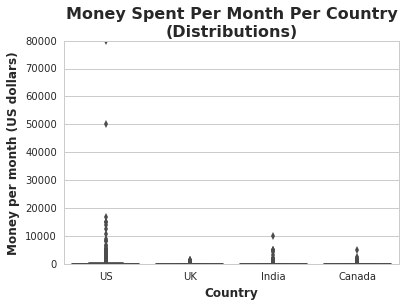

In [14]:



sns.boxplot(x='CountryLive',y='MonthlyMoney',data=only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()



We see that the US has two individuals who spend 50,000 and 80,000 per month on learning. This seems extremely unlikely, so we will remove these two values. There are no extreme outliers visible so far for the UK, India, or Canada. Let's remove the two largest values and recreate this plot.

In [15]:
only_4 = only_4[only_4['MonthlyMoney'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



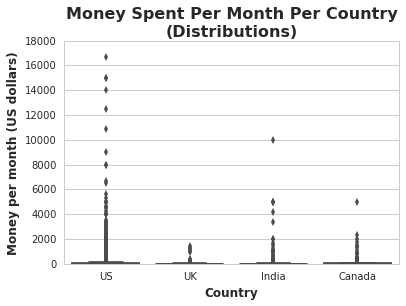

In [16]:
sns.boxplot(x='CountryLive',y='MonthlyMoney',data=only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [17]:
only_4['CountryLive'].value_counts()

United States of America    2931
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Even individuals spending more than 10,000 a month seems unusual. It's a small number (5) compared to the total individuals who live in the US (2931). Let's calculate the mean again to see where things stand. 

In [18]:
only4_mean = only_4.groupby('CountryLive').mean()
only4_mean['MonthlyMoney']


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlyMoney, dtype: float64

There are still a few outliers, so let's take a closer look at those before continuing.

In [19]:
india_outliers = only_4[(only_4['MonthlyMoney'] > 4000) &
                      (only_4['CountryLive'] == 'India')]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyMoney
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [20]:
us_outliers = only_4[(only_4['MonthlyMoney'] > 10000) &
                      (only_4['CountryLive'] == 'United States of America')]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyMoney
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


It's still unclear if the participants understood the questions correctly. These are relatively small numbers we are dealing with, but for consistency, let's remove all participants who indicated they spent more than 4,000 a month on learning. 

In [21]:
only_4 = only_4[only_4['MonthlyMoney'] < 4000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



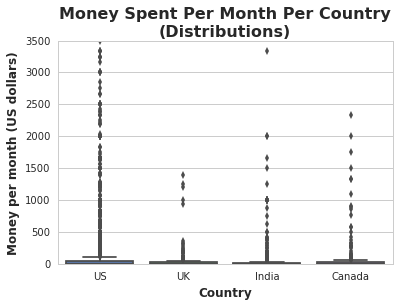

In [22]:
sns.boxplot(x='CountryLive',y='MonthlyMoney',data=only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [23]:
only4_mean = only_4.groupby('CountryLive').mean()
only4_mean['MonthlyMoney']


CountryLive
Canada                       93.065400
India                        72.893205
United Kingdom               45.534443
United States of America    119.306296
Name: MonthlyMoney, dtype: float64

## Choosing the Two Best Markets

We have done enough analysis that we are ready to make our decision on the two best markets to advertise in.

The US is the clear first choice. It has the largest numbers of active users seeking to learn and users in the US spend the largest amount per month at around 119. 

The second choice is a little more difficult to make. While learners in Canada are willing to spend the second most at 93 per month, they make up only 6% of the four countries we are analyzing. India makes up the second most, at 11%, and users in India are willing to spend around 72 per month, well about our 59 per month price tag. Finally, we see that around the same percentage of learnes (15%) in both Canada and India currently spend more than 59 per month. This might indicate that we would see the same level of adoption of our service in both countries. 

Deciding a second country to advertise in is a balance between the available market and price point. 

In [24]:
only_4['CountryLive'].value_counts(normalize = True) * 100


United States of America    74.851842
India                       11.801082
United Kingdom               7.188869
Canada                       6.158207
Name: CountryLive, dtype: float64

In [34]:
# find percentage of each country who spend more than 59 per month

more_than_59 = only_4[only_4['MonthlyMoney'] >= 59]

sub_cost_percent = more_than_59.groupby('CountryLive')['MonthlyMoney'].count() / only_4.groupby('CountryLive')['MonthlyMoney'].count()

sub_cost_percent*100

CountryLive
Canada                      16.317992
India                       15.283843
United Kingdom              15.412186
United States of America    21.893287
Name: MonthlyMoney, dtype: float64